# Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Desicion Tress:

## ¿Qué es un decision tree?

Un árbol de desición es una herramienta tanto de clasificación como de regresión de datos con el fin de realizar predicciónes de una variable en función de otras. La estructura básica de un árbol de desición es la de un condicional $\textbf{``if - else"}$ concatenado con otros $\textbf{``if - else"}$.  

Suponga una estructura de datos como la siguiente

![1](/root/Platzi/CurArbDec/images/1.png)

donde se quiere crear un algoritmo que clasifique los 50 datos rojos y los 50 azules. Un árbol de desición tiene la siguiente estructura: 

![2](/root/Platzi/CurArbDec/images/2.png)  

![3](/root/Platzi/CurArbDec/images/3.png)

La creación de un árbol de desición para predecir $y$ en función de $x_1, ..., x_n$ consiste en encontrar la variable $x_k$ que mas influye en el valor de $y(x_1,...,x_n)$, para luego hacer encontrar la variable que mas influye $x_{k_{a}}$ que mas influye en $y(x_1, ..., x_k=a,...,x_n)$ para una bifurcación aproíada $a$ de los valores que puede tomar $x_k$, asignando en cada paso la probabilidad de la distribución tomada de los datos.

## Exploración de datos

In [2]:
df_car = pd.read_csv('/root/Platzi/CurArbDec/data/car_evaluation.csv')

Es un dataset de carros con variables precio, costo de mantenimiento, # puertas, # pasajeros, tamaño, seguridad y el estado del carro

In [3]:
df_car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df_car.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [6]:
df_car['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [7]:
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Preparación de los datos

In [8]:
X = df_car.drop('class', axis=1)
y = df_car['class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## "Entrenamiento" del árbol de desición

In [10]:
pd.set_option('future.no_silent_downcasting', True)

In [11]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [12]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [13]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [14]:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [15]:
y_train_pred_tree

array(['acc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

## Evaluando el árbol

A tener en cuenta con la matriz de confusión

Verdadero positivo: predije verdadero y era verdadero  
Verdadero falso: predije falso y era falso  
Falso positivo: predije verdadero y era falso  
Falso negativo: predije falso y era verdadero

![a](/root/Platzi/CurArbDec/images/a.png)

Accuracy aceptable al menos de 80%  
Lo ideal es maximizar todas las medidas

In [16]:
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

In [17]:
train_accuracy_tree

0.7673841059602649

In [18]:
test_accuracy_tree

0.8015414258188824

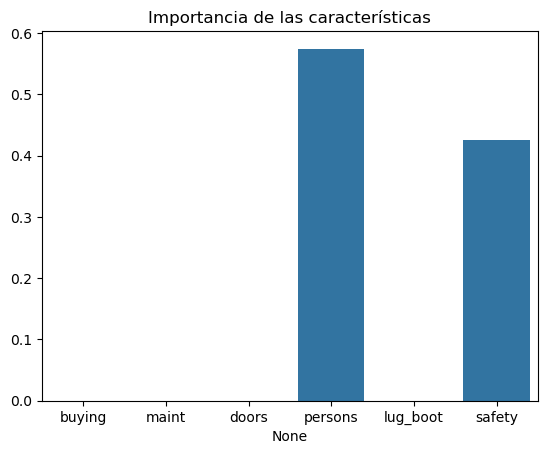

In [19]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances)
plt.title('Importancia de las características')
plt.show()

# Random Forests

## ¿Qué es un bosque aleatorio?

En un problema de regresión o de clasificación cuando usamos un árbol de desición estamos tomando un pequeño set aleatorio de datos para entrenar el árbol, pero si tomasemos otro, las bifurcaciones pueden llegar a ser distintas lo que desenboca en posibles prediccionoes distintas. Apelando a que la democracia funciona (spoiler: casi nunca, pero este es un ejemplo de que si) podriamos generar una cantidad arbitraria de árboles de desición y ponerlos a votar por un resultado. Así, simplemente si es un problema de regresión promediamos y si es un problema de clasificación escojemos la opción mas votada. 

![b](/root/Platzi/CurArbDec/images/b.png)

## Exploración de los datos

In [20]:
df_diabetes = pd.read_csv('/root/Platzi/CurArbDec/data/pima-indians-diabetes.csv')

Es un dataset de pacientes con diabetes en India. Class es la variable a predecir

In [21]:
df_diabetes.columns = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']

In [22]:
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

In [23]:
df_diabetes.isnull().sum()

1. Number of times pregnant                                                    0
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
3. Diastolic blood pressure (mm Hg)                                            0
4. Triceps skin fold thickness (mm)                                            0
5. 2-Hour serum insulin (mu U/ml)                                              0
6. Body mass index (weight in kg/(height in m)^2)                              0
7. Diabetes pedigree function                                                  0
8. Age (years)                                                                 0
9. Class variable (0 or 1)                                                     0
dtype: int64

## Entrenamiento del bosque aleatorio

In [24]:
X = df_diabetes.drop('9. Class variable (0 or 1)', axis=1)
y = df_diabetes['9. Class variable (0 or 1)']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=00000)

In [26]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

In [27]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [28]:
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

In [29]:
y_test_pred_rf

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

## Evaluando el bosque

In [30]:
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

In [31]:
train_accuracy_rf

1.0

In [32]:
test_accuracy_rf

0.7705627705627706

<Axes: xlabel='importance', ylabel='feature'>

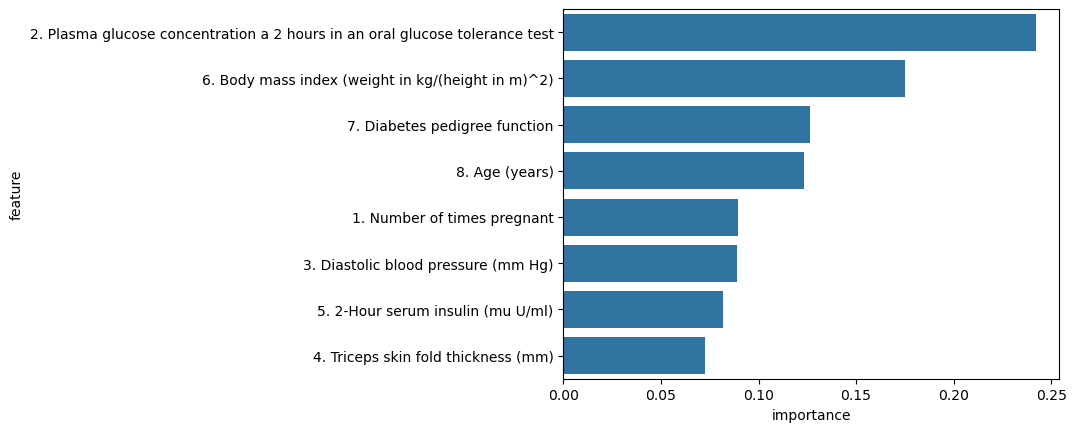

In [34]:
feature_importances = pd.DataFrame({"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending=False)

sns.barplot(x=feature_importances['importance'], y=feature_importances['feature'])